## Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df1 = pd.read_csv('/Users/Ketan/Datasets/data_clean.csv')

In [3]:
df1.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [4]:
df2= df1.iloc[:,1:]

In [5]:
df2.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [6]:
df2.shape

(158, 9)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [8]:
df2['Month'] = pd.to_numeric(df2['Month'], errors='coerce')

In [9]:
df2['Temp C'] = pd.to_numeric(df2['Temp C'], errors='coerce')

In [10]:
df2['Weather'] = df2['Weather'].astype('category')
df2['Wind'] = df2['Wind'].astype('int64')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    int64   
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 10.3 KB


In [12]:
df2[df2.duplicated()].shape

(1, 9)

In [13]:
df2[df2.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14,75.0,9.0,28,2010,75,S


In [14]:
df3= df2.drop_duplicates()

In [15]:
df3.shape

(157, 9)

In [16]:
df3[df3.duplicated()].shape

(0, 9)

In [17]:
df4= df3.drop('Temp C', axis=1)

In [18]:
df4.shape

(157, 8)

In [19]:
df5 = df4.rename({'Solar.R': 'Solar'}, axis=1)

In [20]:
df5.head(2)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7,5.0,1,2010,67,S
1,36.0,118.0,8,5.0,2,2010,72,C


<AxesSubplot:xlabel='Ozone'>

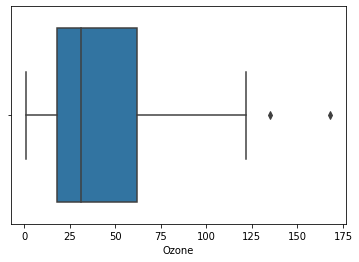

In [21]:
sns.boxplot(x='Ozone', data=df5)

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(df5.Ozone, edgecolor='black', bins=15)

<AxesSubplot:>

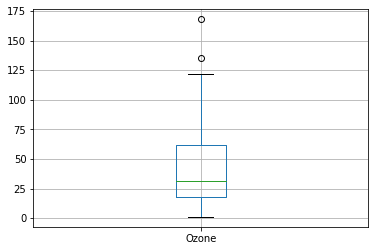

In [23]:
df5.boxplot(column=['Ozone'])

In [24]:
df5.Ozone.describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [25]:
df5.Weather.value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

<AxesSubplot:>

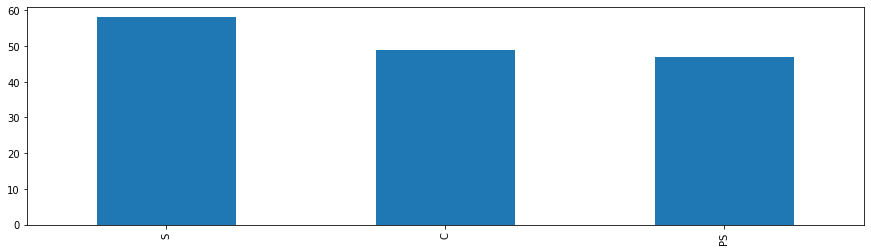

In [26]:
plt.figure(figsize=(15,4))
df5.Weather.value_counts().plot.bar()

In [27]:
cols= df5.columns

<AxesSubplot:>

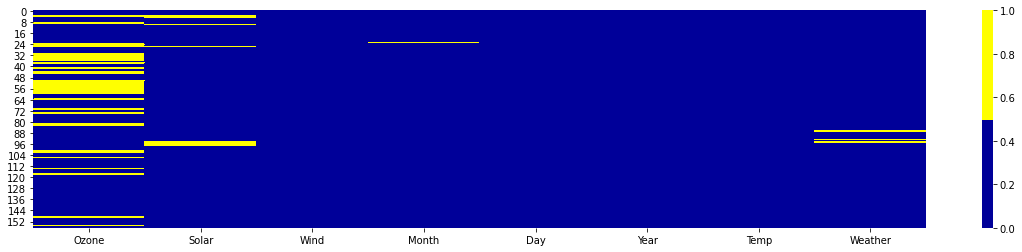

In [28]:
colors = ['#000099', '#ffff00']
plt.figure(figsize=(20,4))
sns.heatmap (df5[cols].isnull(), cmap=sns.color_palette(colors))

<AxesSubplot:>

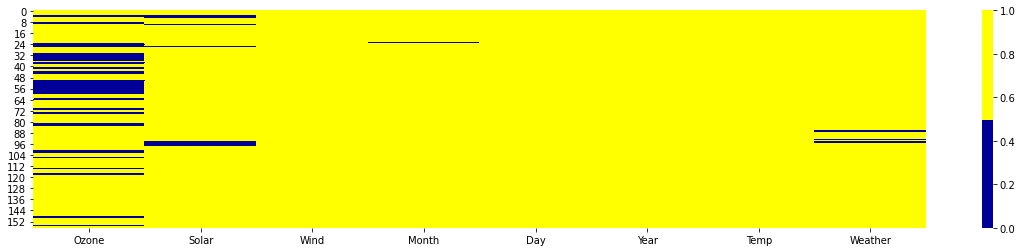

In [29]:
colors = ['#000099', '#ffff00']
plt.figure(figsize=(20,4))
sns.heatmap (df5[cols].notnull(), cmap=sns.color_palette(colors))

In [30]:
df5[df5.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14,5.0,5,2010,56,S
5,28.0,NaN,14,5.0,6,2010,66,C
9,NaN,194.0,8,5.0,10,2010,69,S
10,7.0,NaN,6,5.0,11,2010,74,C
23,32.0,92.0,12,NaN,24,2010,61,C


In [31]:
df5.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [32]:
mean = df5.Ozone.mean()
print(mean)

41.81512605042017


In [33]:
df5['Ozone'] = df5['Ozone'].fillna(mean)

In [34]:
df5.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [35]:
smean = df5.Solar.mean()
print(smean)

185.36666666666667


In [36]:
df5['Solar'] = df5['Solar'].fillna(smean)

In [37]:
df5.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [38]:
df5[df5.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
23,32.0,92.000000,12,NaN,24,2010,61,C
87,52.0,82.000000,12,7.0,27,2010,86,NaN
93,9.0,24.000000,13,8.0,2,2010,81,NaN
95,78.0,185.366667,6,8.0,4,2010,86,NaN


In [39]:
mmode = df5.Month.mode()
print(mmode)

0    9.0
dtype: float64


In [40]:
df5['Month'] = df5['Month'].fillna(mmode)

In [41]:
df5.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [42]:
weather = df5[['Weather']]

In [43]:
weather.isnull().sum()

Weather    3
dtype: int64

In [44]:
mode = weather.mode()
print(mode)

  Weather
0       S


In [45]:
weather = weather.fillna(mode.iloc[0])

In [46]:
weather.isnull().sum()

Weather    0
dtype: int64

In [47]:
df6 = pd.concat([df5,weather],axis=1)

In [48]:
df6.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [49]:
month = df5[['Month']]

In [50]:
month.isnull().sum()

Month    1
dtype: int64

In [51]:
monmode = month.mode()

In [52]:
month = month.fillna(monmode.iloc[0])

In [53]:
month.isnull().sum()

Month    0
dtype: int64

In [54]:
df = pd.concat([df6, month],axis=1)

In [55]:
df.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
Month      0
dtype: int64

In [56]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather,Month
0,41.000000,190.000000,7,5.0,1,2010,67,S,S,5.0
1,36.000000,118.000000,8,5.0,2,2010,72,C,C,5.0
2,12.000000,149.000000,12,5.0,3,2010,74,PS,PS,5.0
3,18.000000,313.000000,11,5.0,4,2010,62,S,S,5.0
4,41.815126,185.366667,14,5.0,5,2010,56,S,S,5.0
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11,9.0,30,2010,68,S,S,9.0
153,41.000000,190.000000,7,5.0,1,2010,67,C,C,5.0
154,30.000000,193.000000,6,9.0,26,2010,70,PS,PS,9.0
155,41.815126,145.000000,13,9.0,27,2010,77,S,S,9.0


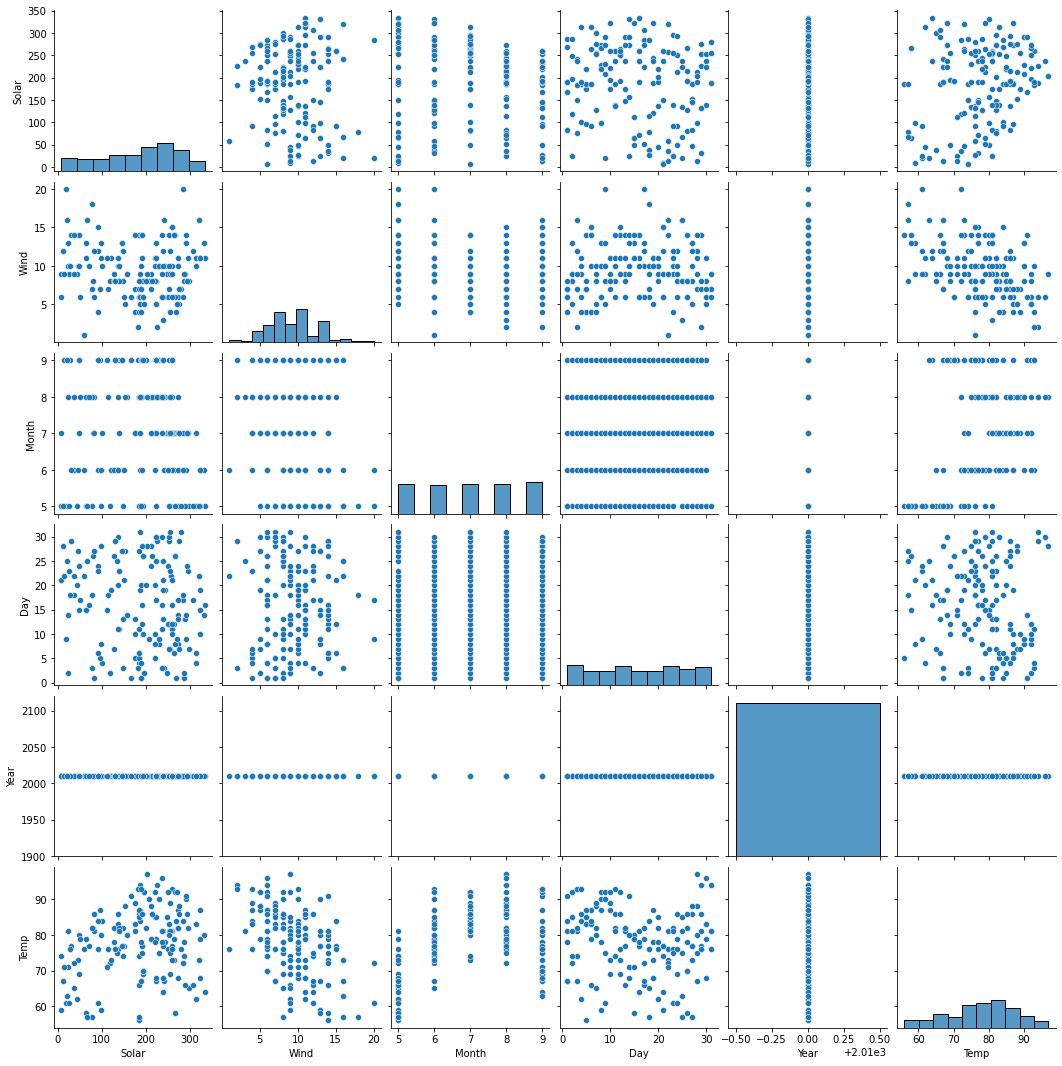

In [57]:
sns.pairplot(df.iloc[:,1:7])

In [58]:
df.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Month
Ozone,1.000000,0.304559,-0.512566,0.132860,-0.021916,NaN,0.606500,0.128969
Solar,0.304559,1.000000,-0.065213,-0.090902,-0.151007,NaN,0.260677,-0.099461
Wind,-0.512566,-0.065213,1.000000,-0.167450,0.044380,NaN,-0.444875,-0.159704
Month,0.132860,-0.090902,-0.167450,1.000000,0.050055,NaN,0.398516,1.000000
Day,-0.021916,-0.151007,0.044380,0.050055,1.000000,NaN,-0.122787,0.057536
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.444875,0.398516,-0.122787,NaN,1.000000,0.376382
Month,0.128969,-0.099461,-0.159704,1.000000,0.057536,NaN,0.376382,1.000000


In [59]:
df = pd.get_dummies(df1, columns=['Weather'])

In [60]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,1,41.0,190.0,7.4,67,5,1,2010,67,0,0,1
1,2,36.0,118.0,8.0,72,5,2,2010,72,1,0,0
2,3,12.0,149.0,12.6,74,5,3,2010,74,0,1,0
3,4,18.0,313.0,11.5,62,5,4,2010,62,0,0,1
4,5,NaN,NaN,14.3,56,5,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,1,0,0
154,155,30.0,193.0,6.9,70,9,26,2010,70,0,1,0
155,156,NaN,145.0,13.2,77,9,27,2010,77,0,0,1
156,157,14.0,191.0,14.3,75,9,28,2010,75,0,0,1


In [61]:
!pip install pandas_profiling
!pip install sweetviz

In [62]:
import sweetviz as sv

In [63]:
sweet_report = sv.analyze(df1)
sweet_report.show_html('weather_report.html')


Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
